# 6. Edge Detection - Sobel Filter

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def display_image(img, title=""):
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

Detect the edges of an image using the Sobel filter, by implementing the following steps: 
- **a)** calculate the first derivatives of the image in x and y directions, using the Sobel() function;
- **b)** calculate the approximate value of the gradient by combining the directional derivatives;
- **c)** show the "gradient image";

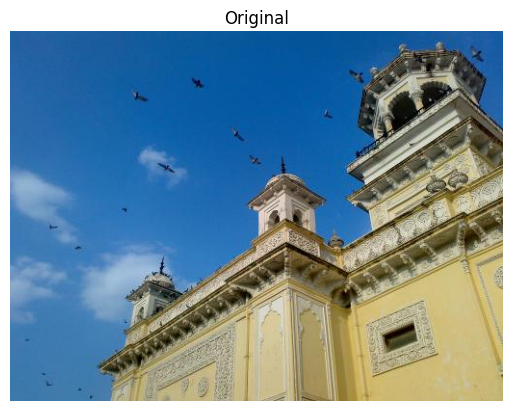

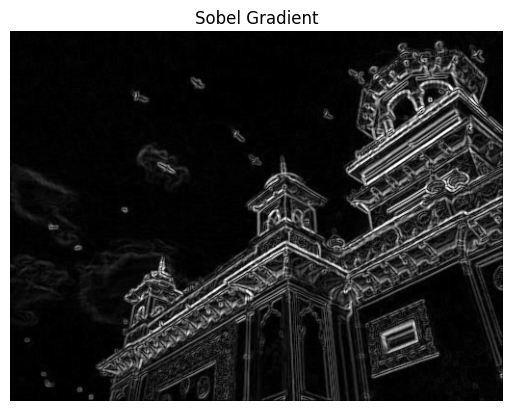

In [6]:
IMAGE_PATH = "../../images/home.jpg"

image = cv2.imread(IMAGE_PATH)

image_blur = cv2.GaussianBlur(image, (5, 5), 0)

image_gray = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY)

DDEPTH = 3

# Gradient X
grad_x = cv2.Sobel(image_gray, DDEPTH, 1, 0, ksize=5)

# Gradient Y
grad_y = cv2.Sobel(image_gray, DDEPTH, 0, 1, ksize=5)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

display_image(image, "Original")
display_image(grad, "Sobel Gradient")

- **d)** show the result of thresholding the "gradient image"; use a trackbar to select the threshold value;

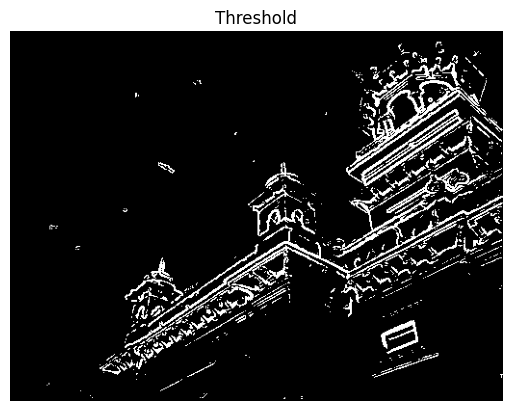

In [8]:
cv2.namedWindow("Thresholding")
dst = grad


def threshold(value):
    threshold_value = cv2.getTrackbarPos("Value", "Thresholding")

    global dst
    _, dst = cv2.threshold(grad, threshold_value, 255, cv2.THRESH_BINARY)
    cv2.imshow("Thresholding", dst)


cv2.createTrackbar("Value", "Thresholding", 0, 255, threshold)
cv2.waitKey()
cv2.destroyAllWindows()

display_image(dst, "Threshold")